In [1]:
import sys 
import os 

sys.path.append('../..')

DATA_DIR = '../../data'
os.environ['DATA_DIR'] = DATA_DIR

from utils.things import calc_correlation, get_all_vectorized, sort_vec, match_behv_sim
from utils.correlation import calc_semi_partial_correlation
from utils.data import load_gpt, load_cslb, load_mcrae, load_behav
import matplotlib.pyplot as plt 

from utils.correlation import get_similiarity_vector
from utils.vectorization import vectorize_concepts
from utils.data import load_cslb_count_vec, load_sorting
from utils.feature_norms import generate_concepts_to_keep 

# Load vectorized feature norms

## 317 Objects - 30 Inits
but use raw feature norm with all 1854 objects 

In [2]:
group_to_one_concept = True
duplicates = True 
min_amount_runs_feature_occured = 4
min_amount_runs_feature_occured_within_concept = 1

# 317 objects are used to calculate similarities
feature_norms = {
    'McRae': load_mcrae(group_to_one_concept, duplicates),
    'CSLB': load_cslb(group_to_one_concept),
    'GPT3-McRae-30': load_gpt(min_amount_runs_feature_occured, group_to_one_concept, min_amount_runs_feature_occured_within_concept, duplicates, 'mcrae_priming', 'gpt3-davinci', 30, 1854),
    'ChatGPT3-McRae-30': load_gpt(min_amount_runs_feature_occured, group_to_one_concept, min_amount_runs_feature_occured_within_concept, duplicates, 'mcrae_priming', 'chatgpt-gpt3.5-turbo', 30, 1854)
}

intersection_concepts = generate_concepts_to_keep(feature_norms, 'intersection')
feature_norms_vec, behav_sim_matched = get_all_vectorized(feature_norms, intersection_concepts, 'count')

corr = calc_correlation(feature_norms_vec, behav_sim_matched)
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

../../data


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


317 concepts are present in all feature norms


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


McRae
(317, 2524)
50086
CSLB
(317, 2725)
50086
GPT3-McRae-30
(317, 11720)
50086
ChatGPT3-McRae-30
(317, 18771)
50086


/tmp/ipykernel_4360/194708153.py:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)


,THINGS,McRae,CSLB,GPT3-McRae-30,ChatGPT3-McRae-30
THINGS,1.000,0.559,0.631,0.622,0.519
McRae,0.559,1.000,0.789,0.789,0.735
CSLB,0.631,0.789,1.000,0.799,0.764
GPT3-McRae-30,0.622,0.789,0.799,1.000,0.811
ChatGPT3-McRae-30,0.519,0.735,0.764,0.811,1.000


# 317 Objects - 10 Inits
but from raw feature using 317 objects and 10 inits

In [3]:
group_to_one_concept = True
duplicates = True 
min_amount_runs_feature_occured = 4
min_amount_runs_feature_occured_within_concept = 1

# 317 objects are used to calculate similarities
feature_norms = {
    'McRae': load_mcrae(group_to_one_concept, duplicates),
    'CSLB': load_cslb(group_to_one_concept),
    
    # TODO 10 runs 
    'GPT3-McRae-10': load_gpt(1, group_to_one_concept, min_amount_runs_feature_occured_within_concept, duplicates, 'mcrae_priming', 'gpt3-davinci', 10, 317),
    'GPT3-CSLB-10': load_gpt(1, group_to_one_concept, min_amount_runs_feature_occured_within_concept, duplicates, 'cslb_priming', 'gpt3-davinci', 10, 317),

    # TODO GPT4
    'GPT4-McRae-10': load_gpt(1, group_to_one_concept, min_amount_runs_feature_occured_within_concept, duplicates, 'mcrae_priming', 'gpt4', 10, 317)
}

intersection_concepts = generate_concepts_to_keep(feature_norms, 'intersection')
feature_norms_vec, behav_sim_matched = get_all_vectorized(feature_norms, intersection_concepts, 'count')

corr = calc_correlation(feature_norms_vec, behav_sim_matched)
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

../../data


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


317 concepts are present in all feature norms


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


McRae
(317, 2524)
50086
CSLB
(317, 2725)
50086
GPT3-McRae-10
(317, 6267)
50086
GPT3-CSLB-10
(317, 6444)
50086
GPT4-McRae-10
(317, 6994)
50086


/tmp/ipykernel_4360/3659209233.py:23: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)


,THINGS,McRae,CSLB,GPT3-McRae-10,GPT3-CSLB-10,GPT4-McRae-10
THINGS,1.000,0.559,0.631,0.597,0.547,0.538
McRae,0.559,1.000,0.789,0.767,0.734,0.748
CSLB,0.631,0.789,1.000,0.797,0.793,0.776
GPT3-McRae-10,0.597,0.767,0.797,1.000,0.919,0.799
GPT3-CSLB-10,0.547,0.734,0.793,0.919,1.000,0.783
GPT4-McRae-10,0.538,0.748,0.776,0.799,0.783,1.000


# All 1854 Objects with 10 Inits

In [4]:
group_to_one_concept = True
duplicates = True 
min_amount_runs_feature_occured_within_concept = 1

feature_norms = {
    'McRae': load_mcrae(group_to_one_concept, duplicates),
    'CSLB': load_cslb(group_to_one_concept),
    'GPT3-McRae-10': load_gpt(4, group_to_one_concept, min_amount_runs_feature_occured_within_concept, duplicates, 'mcrae_priming', 'gpt3-davinci', 10, 1854),
    'GPT3-CSLB-10': load_gpt(4, group_to_one_concept, min_amount_runs_feature_occured_within_concept, duplicates, 'cslb_priming', 'gpt3-davinci', 10, 1854),
}

intersection_concepts = list(feature_norms['GPT3-CSLB-10']['concept_id'].unique())
feature_norms_vec, behav_sim_matched = get_all_vectorized(feature_norms, intersection_concepts, 'count')

corr = calc_correlation(feature_norms_vec, behav_sim_matched)
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

../../data


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


FileNotFoundError: [Errno 2] No such file or directory: '../../data/gpt_3_feature_norm/mcrae_priming/gpt3-davinci/10/1854/decoded_answers.csv'

## Model performance with more runs

In [6]:
# Use concepts that are not used in the final comparison
validation_concepts = generate_concepts_to_keep(feature_norms, 'excl_cslb_mcrae')
gpt_df = load_gpt(min_amount_runs_feature_occured, group_to_one_concept, min_amount_runs_feature_occured_within_concept, duplicates, 'mcrae_priming', 'gpt3-davinci')
behv_sim = match_behv_sim(behav_sim, validation_concepts, load_sorting())

KeyError: 'GPT3-davinci-McRae'

### How does the total number of runs influence the similarity with THINGS?
How many runs should be performed for optimal results? 

/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 5945)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 9667)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 13199)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 16281)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 18724)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 22269)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 24383)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 26078)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 28437)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 29873)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 31559)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 33065)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 34099)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 36610)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 39181)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 41098)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 42561)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 44018)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 46401)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 48282)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 49637)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 51748)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 53093)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 54650)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 55817)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 56830)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 59031)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 60674)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 62080)
1180416


/home/hannes/anaconda3/envs/features/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


GPT3-davinci-McRae
(1537, 63749)
1180416


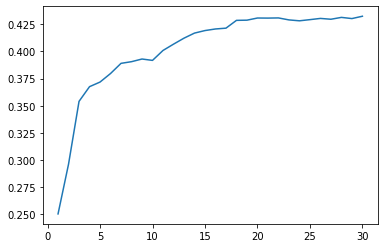

In [ ]:
r = []
for i in range(1, 31):
    runs = list(range(1, i+1))
    gpt_df_temp = gpt_df[gpt_df['run_nr'].isin(runs)]
    gpt_df_temp = gpt_df_temp.groupby('concept_id', as_index=False).agg({'feature': lambda x: ';'.join(x)})
    
    feature_norm_vec = vectorize_concepts(gpt_df_temp, load_sorting(), 'count')
    feature_norm_vec = feature_norm_vec.loc[validation_concepts]
    feature_norm_vec = sort_vec(feature_norm_vec)
    feature_norms = {
        'GPT3-davinci-McRae': feature_norm_vec
    }

    corr = calc_correlation(feature_norms, behv_sim)
    r_gpt_behav = corr['THINGS']['GPT3-davinci-McRae']
    r.append(r_gpt_behav)

plt.plot(range(1, len(r) + 1), r)

# Variance Partioning Analyses

In [ ]:
def vpa(corr_with_things_1, corr_with_things_2, corr_1_with_2):
    explained_variance_gpt = calc_semi_partial_correlation(corr_with_things_1, corr_with_things_2, corr_1_with_2)
    print('unique variance GPT (partial out McRae): {:.4f}'.format(explained_variance_gpt ** 2))

    explained_variance_mc = calc_semi_partial_correlation(corr_with_things_2, corr_with_things_1, corr_1_with_2)
    print('unique variance McRae (partial out GPT): {:.4f}'.format(explained_variance_mc ** 2))

    shared_variance = (corr_with_things_2 ** 2) - (explained_variance_mc ** 2)
    print('shared variance between GPT and McRae: {:.4f}'.format(shared_variance))

In [ ]:
vpa(corr['THINGS']['GPT-McRae'], corr['THINGS']['McRae'], corr['GPT-McRae']['McRae'])

unique variance GPT (partial out McRae): 0.0862
unique variance McRae (partial out GPT): 0.0125
shared variance between GPT and McRae: 0.3003


In [ ]:
vpa(corr['THINGS']['GPT-McRae'], corr['THINGS']['CSLB'], corr['GPT-McRae']['CSLB'])

unique variance GPT (partial out McRae): 0.0039
unique variance McRae (partial out GPT): 0.1555
shared variance between GPT and McRae: 0.3827
